In [1]:
import warnings
warnings.filterwarnings('ignore')

import anndata as ad
import squidpy as sq
import scanpy as sc
import scvi
from scvi.model import CondSCVI, DestVI

from matplotlib import pyplot as plt
from cycler import cycler

import json 
import numpy as np
import os


In [2]:
#FILEPATHBASE = '/Users/mmd47/Library/CloudStorage/GoogleDrive-mmd47@yale.edu/My Drive/DiStasio Lab/DiStasio Lab Share/'
FILEPATHBASE = '/home/mdistasio/YaleGoogleDrive/DiStasio Lab/DiStasio Lab Share/'

# --------------------------------------------------------------------------------
SAVEFIGS = False
if SAVEFIGS:
    IMGDIR = os.path.join(FILEPATHBASE,'02 Analysis', 'annData_ManualAnnotate', 'img')

# --------------------------------------------------------------------------------
# Load concatenated datasets (generated by Preprocess.py
# --------------------------------------------------------------------------------
filename = os.path.join(FILEPATHBASE,'02 Analysis', 'annData_ManualAnnotate', 'calc', 'retinas_all_integrated_harmony.h5ad')
retinas_all = ad.read_h5ad(filename)

retinas_all.obs['batch'] = retinas_all.obs['dataset']
retinas_all.obs['batch'][retinas_all.obs['batch'] == 'R2'] = 'R1'
retinas_all.raw = retinas_all  # keep full dimension safe 

SampleKey = {"R1": "A22_3781", "R2": "A22_3781", "R3": "A23-914", "R4": "A23-1277", "R5": "A23-1279", "R6": "A23-1422", "R7": "A23-1425-M1", "R8": "A23-1152_OD"}

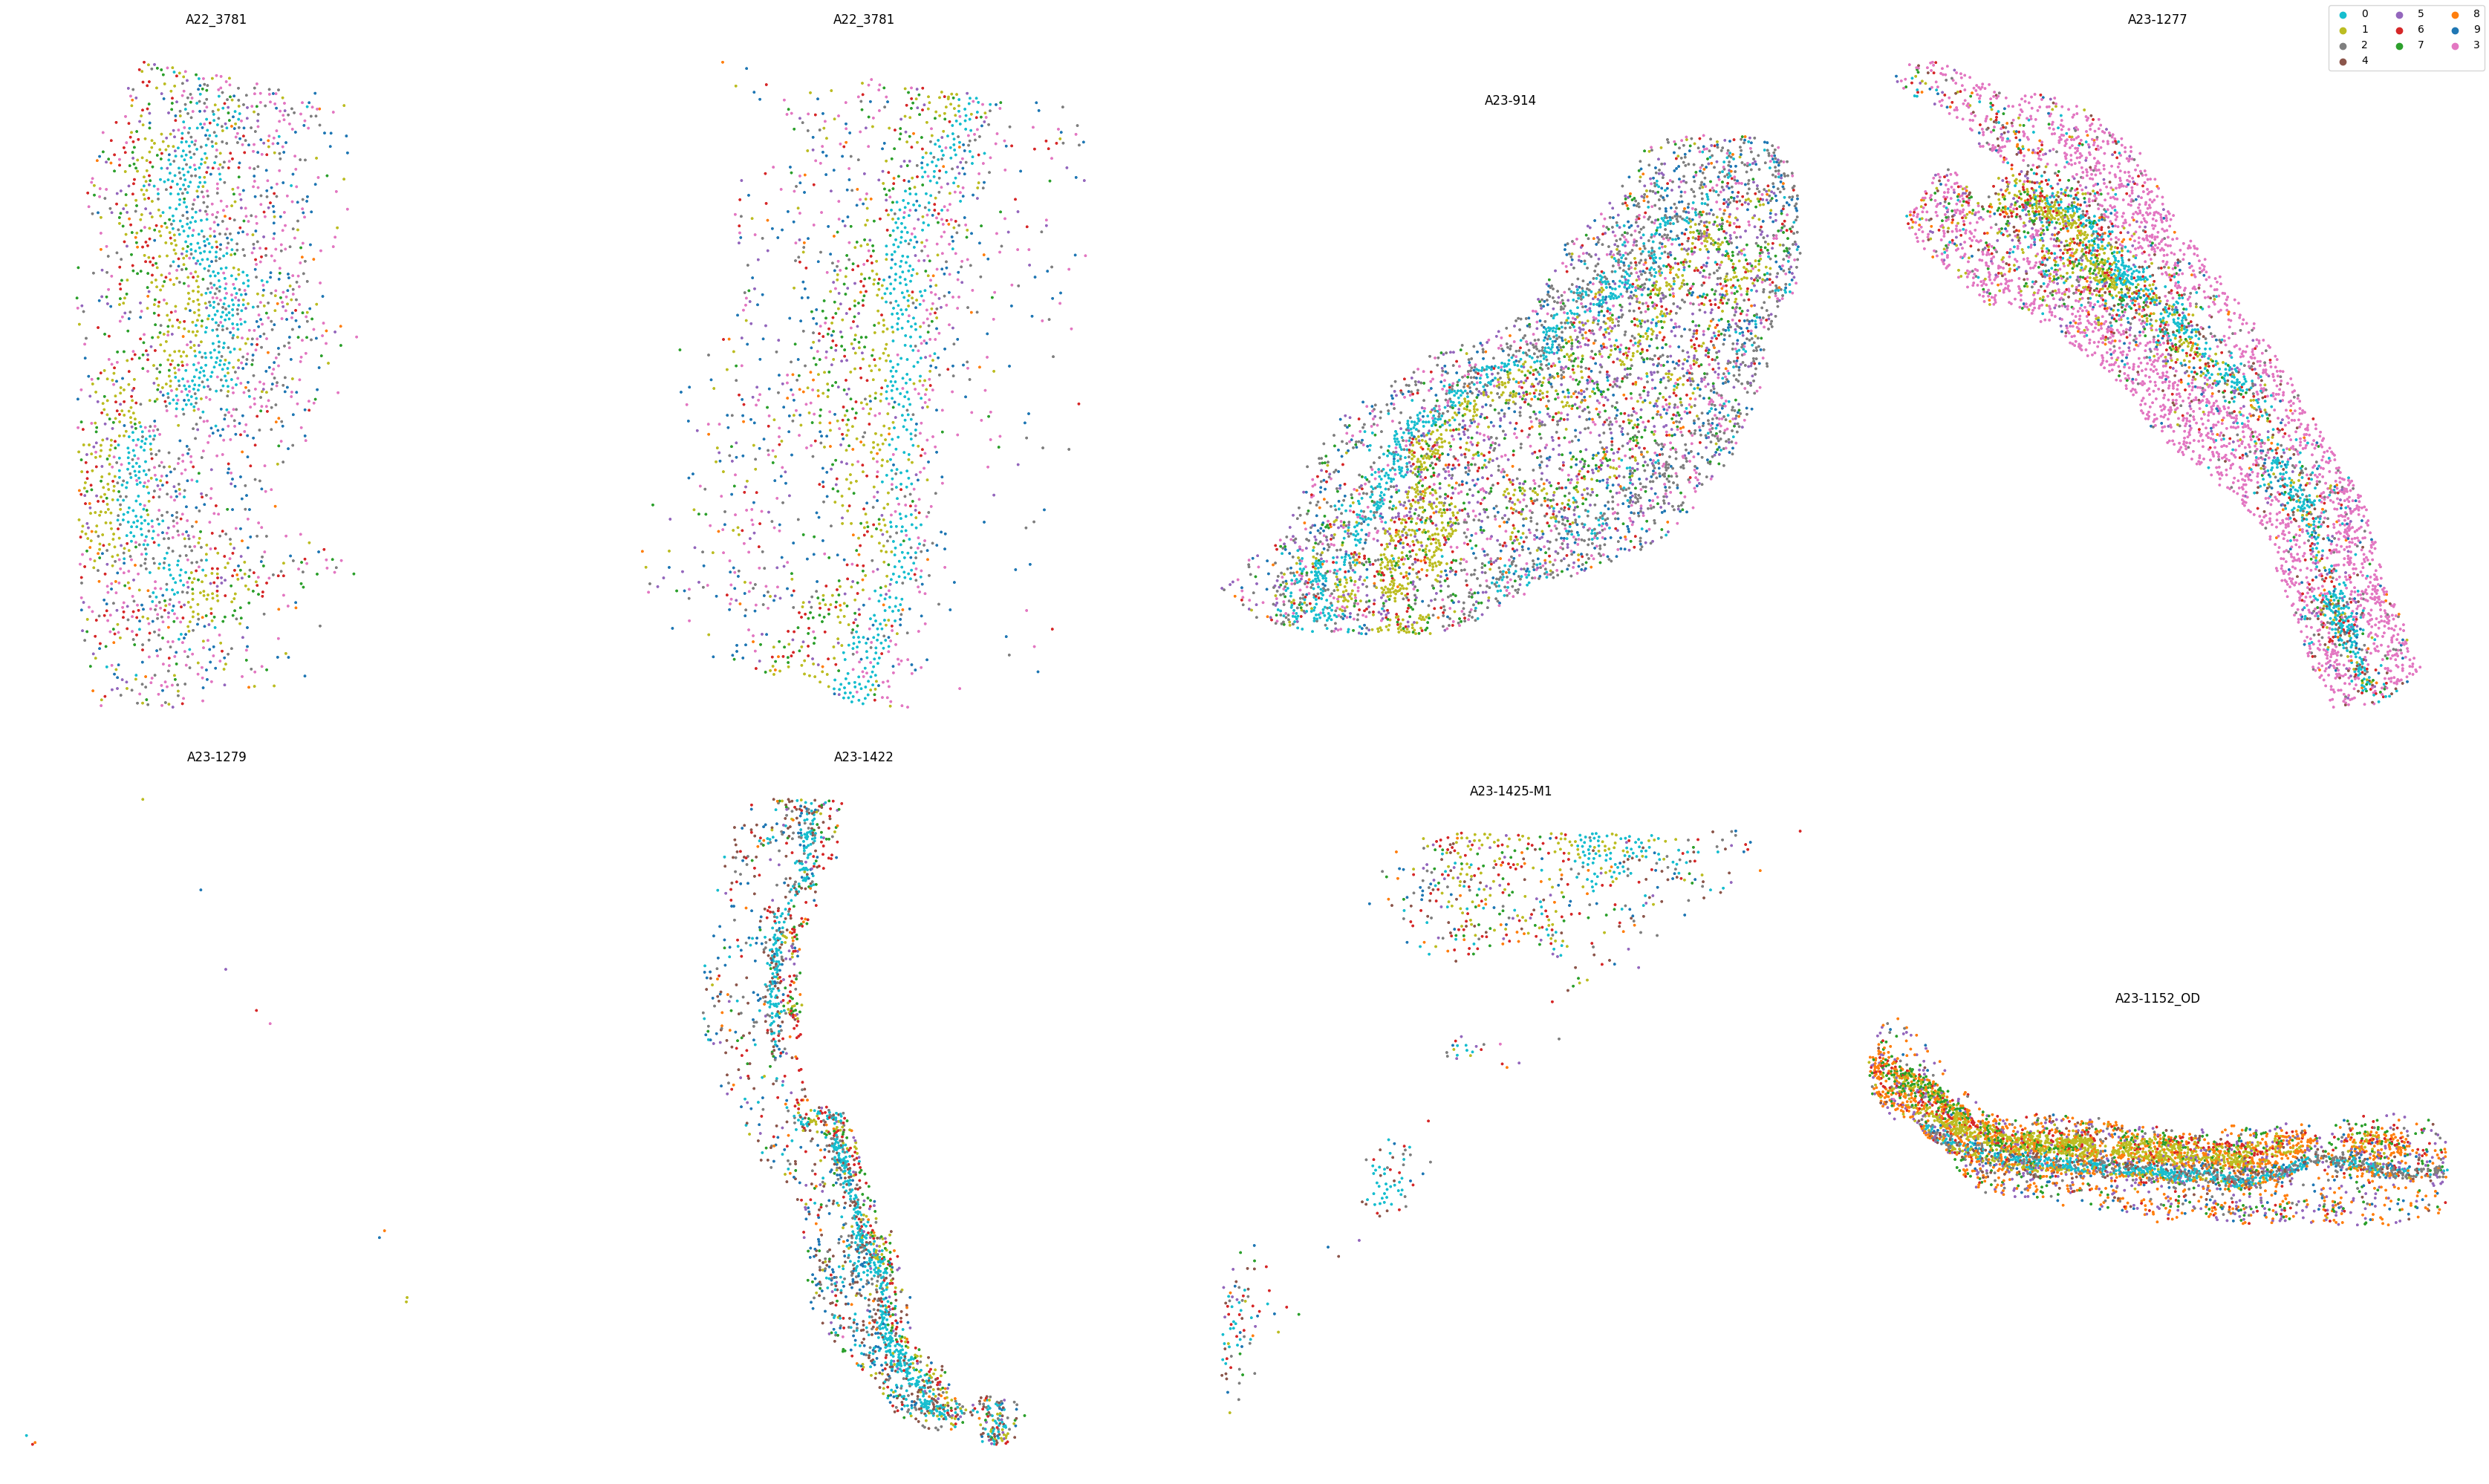

In [3]:
Samples = list(retinas_all.obs['dataset'].cat.categories)

from matplotlib.colors import ListedColormap

nGroupsToPlot = 10
groups = sorted(np.unique(retinas_all.obs['leiden']), key=lambda x: int(x))[0:nGroupsToPlot]

#spect = plt.cm.Spectral.resampled(nGroupsToPlot)
spect = plt.cm.tab10.resampled(nGroupsToPlot)
newcolors = np.flip(spect(np.linspace(0,1,nGroupsToPlot)), axis=0)
newpalette = ListedColormap(newcolors)

nRow = 2
nCol = int(np.ceil(len(Samples)/2))
fig, axs = plt.subplots(nRow, nCol, figsize=(35,20))
for r in np.arange(len(Samples)):
    ax = axs.reshape(-1)[r]
    ss = 10
    sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']==Samples[r]], 
                          color='leiden', 
                          groups=groups,
                          size=ss, 
                          shape=None, 
                          ax=ax, 
                          palette=newpalette)
    ax.set_title(SampleKey[Samples[r]])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_legend().remove()
fig.tight_layout()

labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}
#labels_handles = dict(sorted(labels_handles.items(), key=lambda x: int(x[0]))[0:nColorsToUse])
fig.legend(
    labels_handles.values(),
    labels_handles.keys(),
    loc = "upper right",
    ncol=3
)


plt.show()

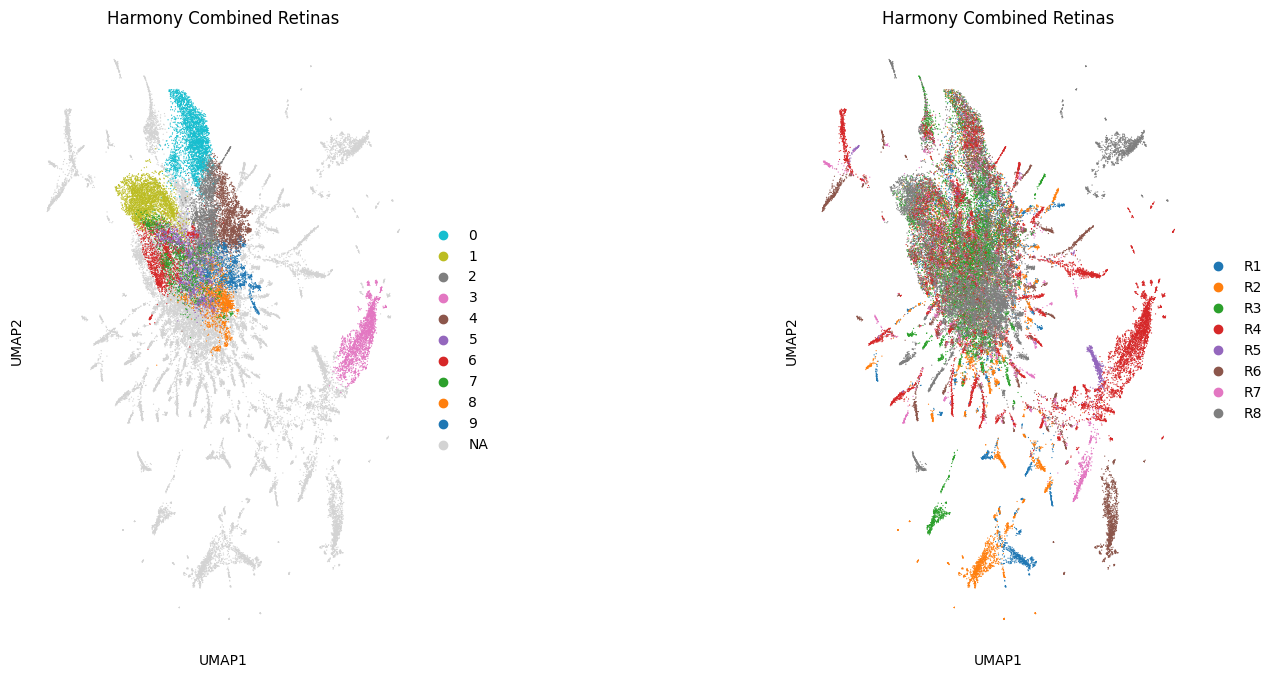

In [4]:

nGroupsToPlot = 10
groups = sorted(np.unique(retinas_all.obs['leiden']), key=lambda x: int(x))[0:nGroupsToPlot]

spect = plt.cm.tab10.resampled(nGroupsToPlot)
newcolors = np.flip(spect(np.linspace(0,1,nGroupsToPlot)), axis=0)
newpalette = ListedColormap(newcolors)
color_cycler = cycler(color=newpalette.colors)

fig, axx = plt.subplots(1, 2, figsize=(15,8),  gridspec_kw={'wspace': 1})                                                                                                                                                                                                                
sc.pl.umap(retinas_all, color="leiden", size=3, ax=axx[0], palette=color_cycler, groups=groups, show=False)                                                                                                                                                                                                                   
sc.pl.umap(retinas_all, color="dataset", size=3, ax=axx[1], show=False)                                                                                                                                                                                                                  
for ax in axx:                                                                                                                                                                                                                                                                           
    ax.set_title('Harmony Combined Retinas')                                                                                                                                                                                                                                             
    ax.spines['top'].set_visible(False)                                                                                                                                                                                                                                                  
    ax.spines['right'].set_visible(False)                                                                                                                                                                                                                                                
    ax.spines['bottom'].set_visible(False)                                                                                                                                                                                                                                               
    ax.spines['left'].set_visible(False)      

<Axes: >

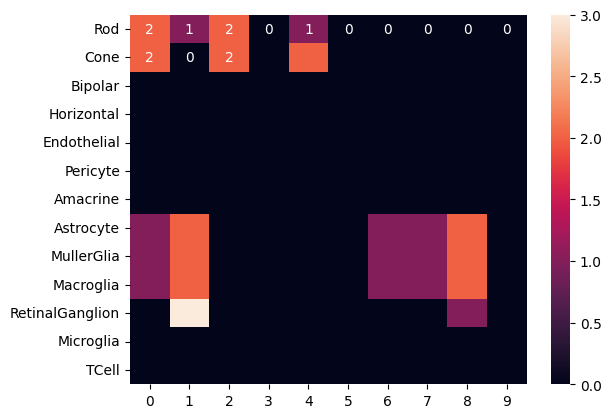

In [5]:
import seaborn as sns

with open(os.path.join(FILEPATHBASE,'02 Analysis/annData_ManualAnnotate/data/retinal_celltype_gates.json')) as f:                                                                                                                                                                                                                               
    gates = json.load(f)    

nGroupsToPlot = 10
groups = sorted(np.unique(retinas_all.obs['leiden']), key=lambda x: int(x))[0:nGroupsToPlot]

sc.tl.rank_genes_groups(retinas_all, 'leiden', groups=groups, use_raw=False)
#sc.pl.rank_genes_groups(st_adata, n_genes=25, sharey=False)

marker_genes = {}
for item in gates:
    cell_type = item['cell']
    gene_list = [gene['gene'] for gene in item['gates']]
    marker_genes[cell_type] = gene_list


ov = sc.tl.marker_gene_overlap(retinas_all, marker_genes)
sns.heatmap(ov, annot=True)


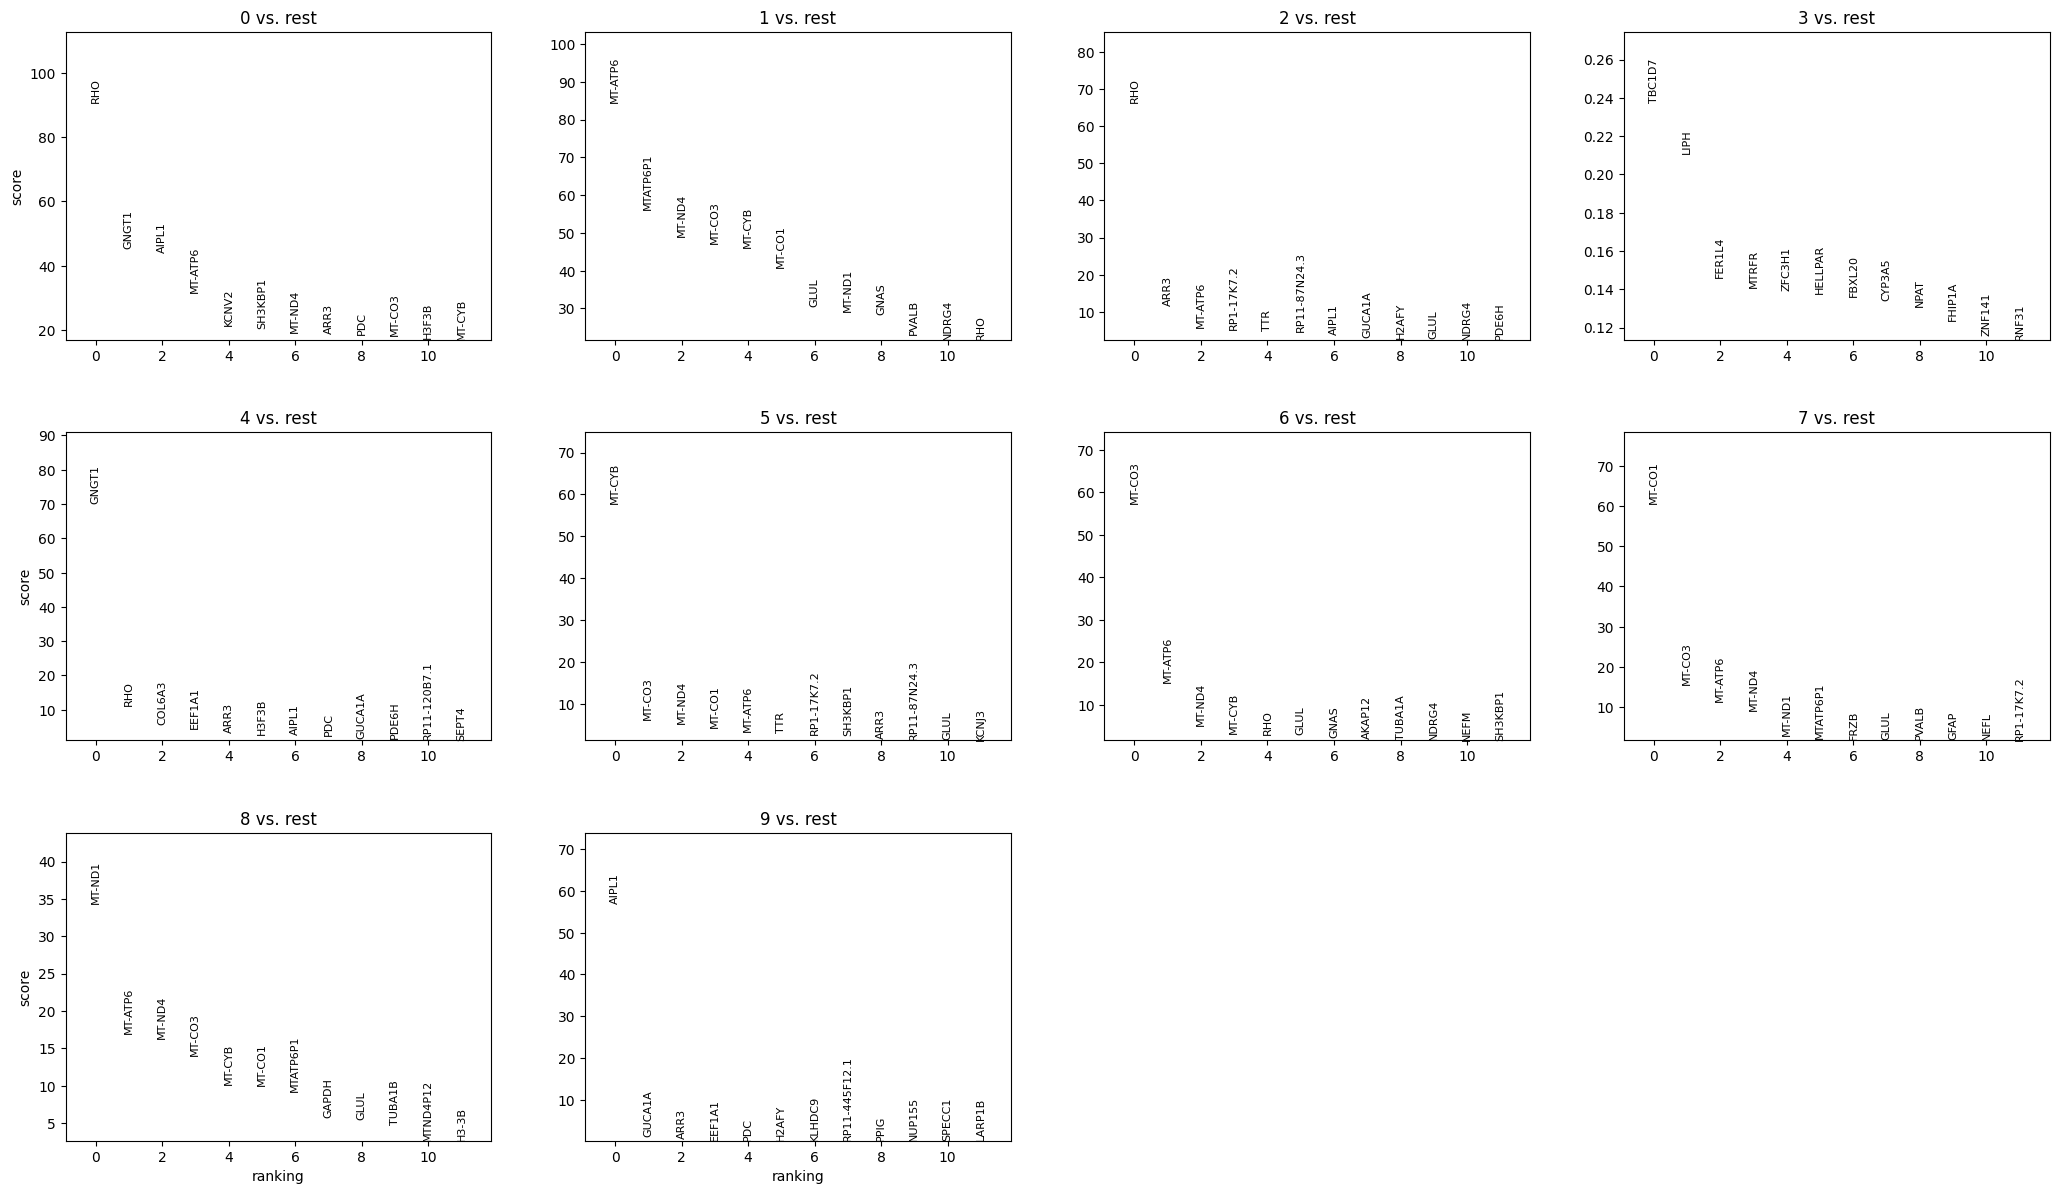

In [6]:
nGroupsToPlot = 10
groups = sorted(np.unique(retinas_all.obs['leiden']), key=lambda x: int(x))[0:nGroupsToPlot]
sc.pp.log1p(retinas_all)

sc.tl.rank_genes_groups(retinas_all, 'leiden', groups=groups, method='wilcoxon')
sc.pl.rank_genes_groups(retinas_all, groups=groups, n_genes=12, sharey=False)

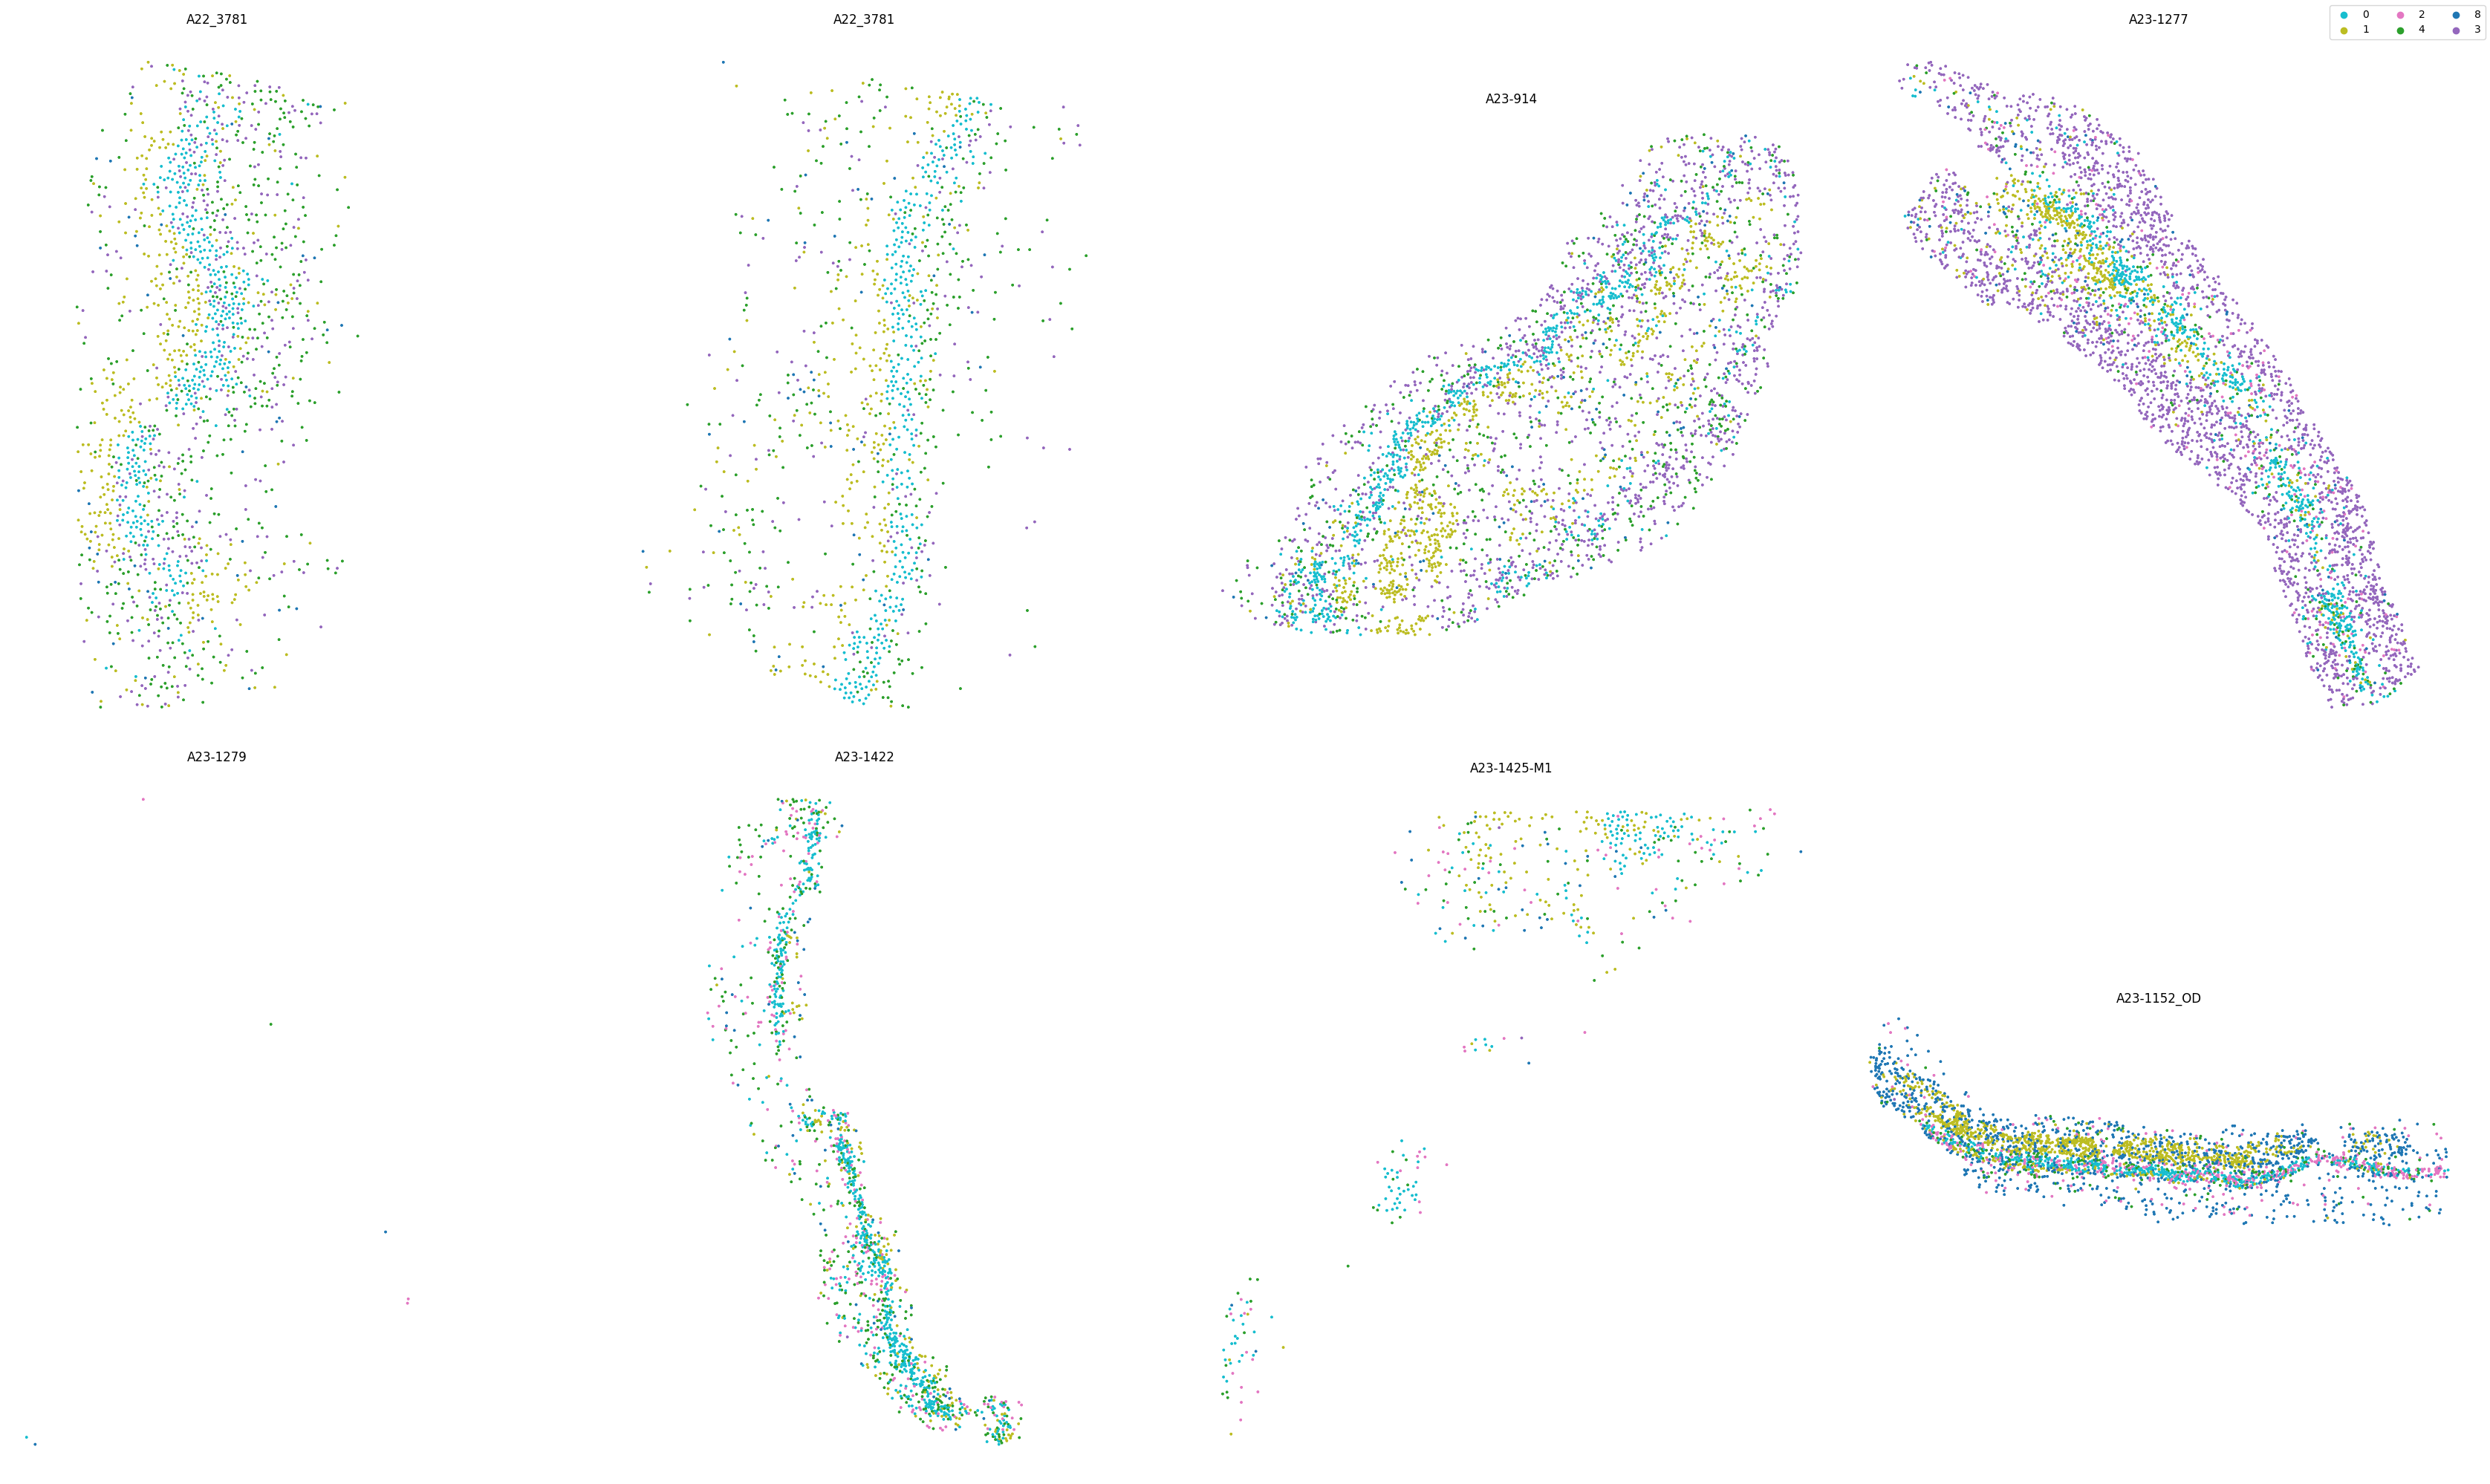

In [11]:



groups = ['0','1','2','3','4','8']
nGroupsToPlot = len(groups)

#spect = plt.cm.Spectral.resampled(nGroupsToPlot)
spect = plt.cm.tab10.resampled(nGroupsToPlot)
newcolors = np.flip(spect(np.linspace(0,1,nGroupsToPlot)), axis=0)
newpalette = ListedColormap(newcolors)

nRow = 2
nCol = int(np.ceil(len(Samples)/2))
fig, axs = plt.subplots(nRow, nCol, figsize=(35,20))
for r in np.arange(len(Samples)):
    ax = axs.reshape(-1)[r]
    ss = 10
    sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']==Samples[r]], 
                          color='leiden', 
                          groups=groups,
                          size=ss, 
                          shape=None, 
                          ax=ax, 
                          palette=newpalette)
    ax.set_title(SampleKey[Samples[r]])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_legend().remove()
fig.tight_layout()

labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}
#labels_handles = dict(sorted(labels_handles.items(), key=lambda x: int(x[0]))[0:nColorsToUse])
fig.legend(
    labels_handles.values(),
    labels_handles.keys(),
    loc = "upper right",
    ncol=3
)


plt.show()